#Importing the Required Libraries & Reading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('revenue_prediction.csv')

In [4]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
data.shape

(100, 8)

In [6]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
data.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue'],
      dtype='object')

In [8]:
data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


# Exploratory Data Analysis

<ipython-input-9-e5020d472c52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Revenue'])


<Axes: xlabel='Revenue', ylabel='Density'>

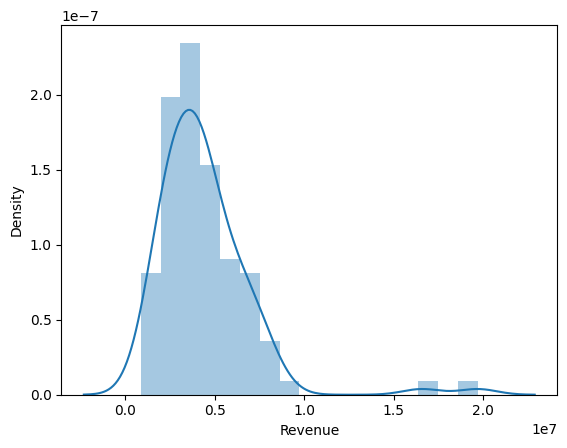

In [9]:
sns.distplot(data['Revenue'])

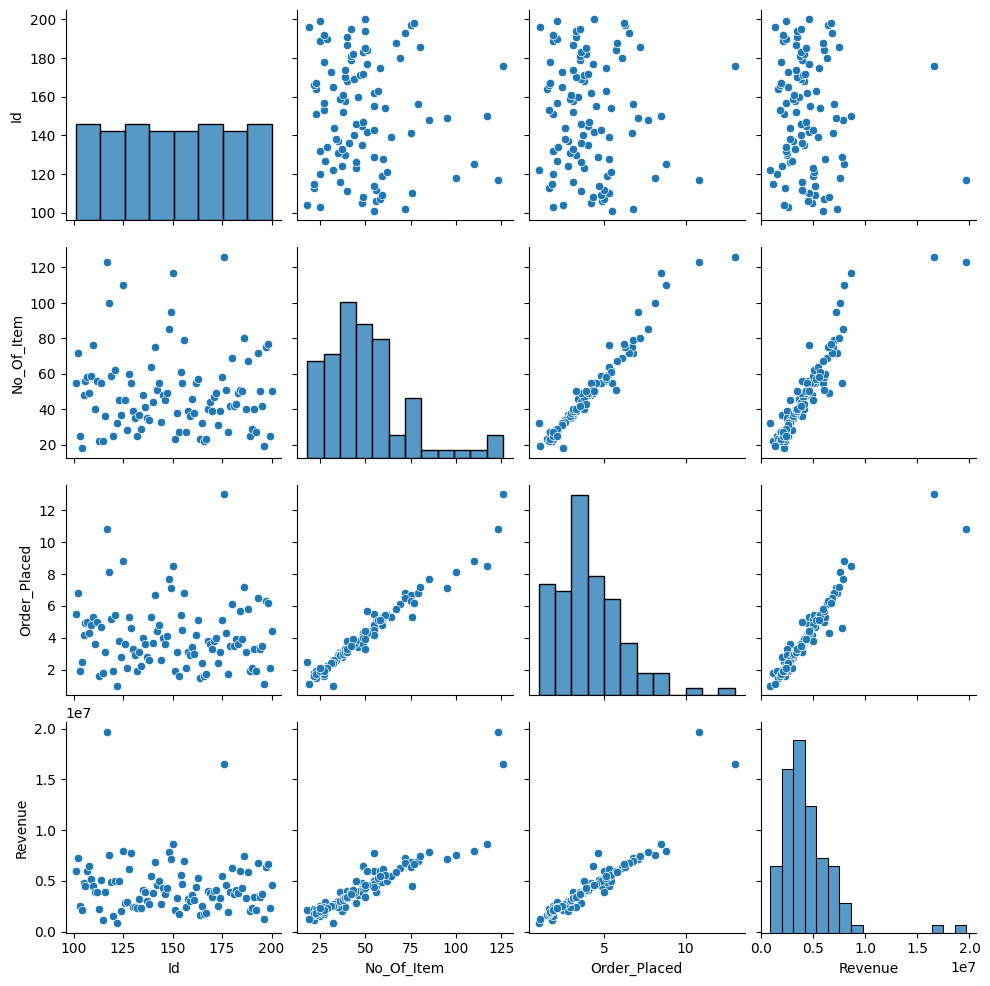

In [10]:
sns.pairplot(data)

In [11]:
#Hence ID is not the relevant columnn here as it doesn't brings any menaingful information for the model.
data.drop(columns='Id',inplace = True)

In [12]:
data.head()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


Text(0.5, 1.0, 'City Vs Revenue Distribution')

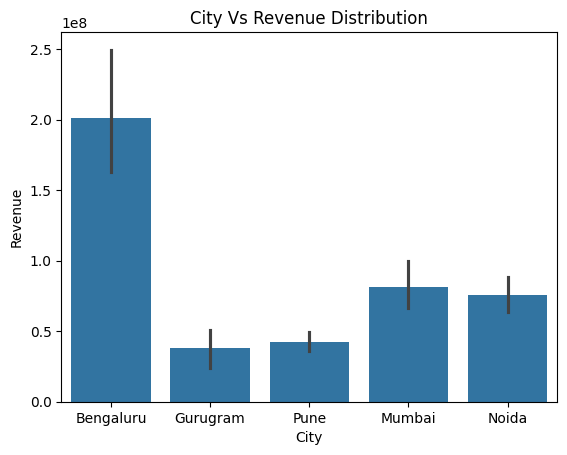

In [13]:
sns.barplot(x='City', y='Revenue', data=data, estimator=sum)
plt.title('City Vs Revenue Distribution')

Text(0.5, 1.0, 'Revenue Distribution for Franchise vs Non-Franchise')

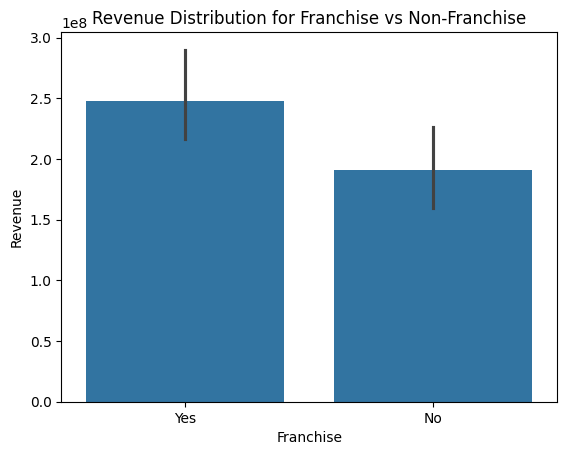

In [14]:
sns.barplot(x='Franchise', y='Revenue', data=data, estimator=sum)
plt.title('Revenue Distribution for Franchise vs Non-Franchise')

In [15]:
data.drop(columns='Name', inplace = True)

In [16]:
corelation_matrix = data.corr()

<ipython-input-16-8831c533bf6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix = data.corr()


<Axes: >

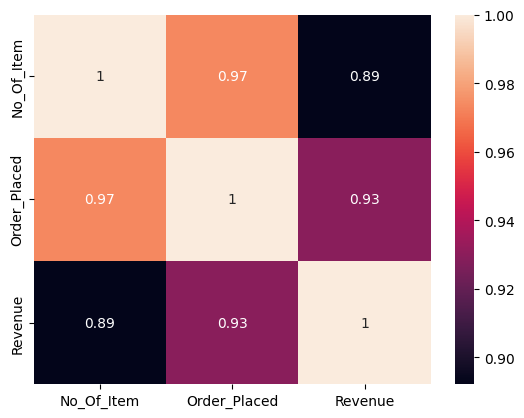

In [17]:
sns.heatmap(corelation_matrix, annot = True)

Text(0.5, 1.0, 'No_Of_Item VS Revenue Relationship')

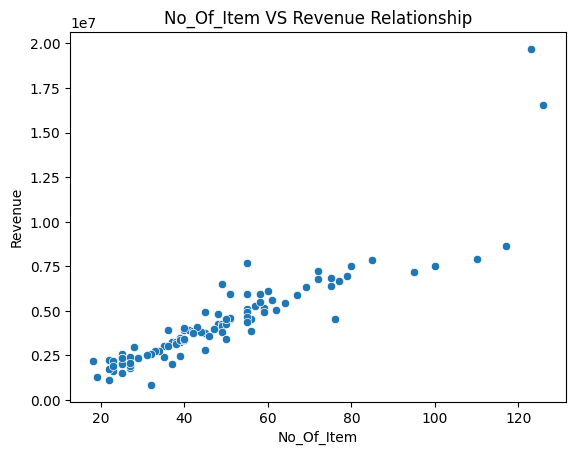

In [18]:
sns.scatterplot(x = 'No_Of_Item', y ='Revenue', data = data)
plt.title('No_Of_Item VS Revenue Relationship')

Text(0.5, 1.0, 'No_Of_Order Placed VS Revenue Relationship')

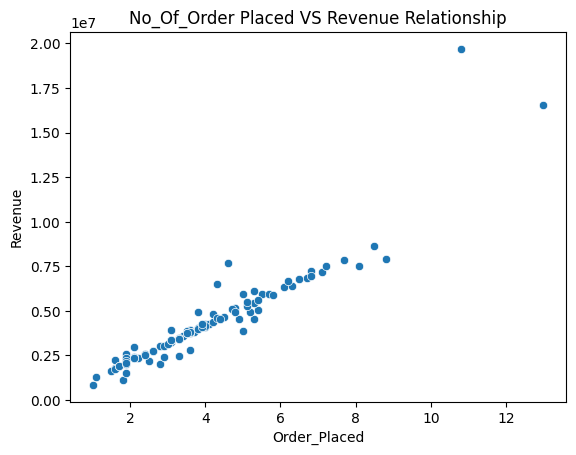

In [19]:
sns.scatterplot(x = 'Order_Placed', y ='Revenue', data = data)
plt.title('No_Of_Order Placed VS Revenue Relationship')

In [20]:
data.drop(columns='Franchise',inplace=True)

In [21]:
data.head()

,Category,City,No_Of_Item,Order_Placed,Revenue
0,Mexican,Bengaluru,55,5.5,5953753
1,Varied Menu,Gurugram,72,6.8,7223131
2,Chicken,Pune,25,1.9,2555379
3,Italian/Pizza,Mumbai,18,2.5,2175511
4,Pizza,Noida,48,4.2,4816715


#Label Encoding the Categorical Columns

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()

In [24]:
data['Category'] = label_encoder.fit_transform(data['Category'])
data['City'] = label_encoder.fit_transform(data['City'])

In [25]:
data.head()

,Category,City,No_Of_Item,Order_Placed,Revenue
0,12,0,55,5.5,5953753
1,19,1,72,6.8,7223131
2,5,4,25,1.9,2555379
3,11,2,18,2.5,2175511
4,13,3,48,4.2,4816715


Splitting Data into Training & Test Data

In [26]:
x = data[['Category', 'No_Of_Item', 'Order_Placed', 'City']]
y = data['Revenue']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 42, test_size=0.3)

In [29]:
X_train

,Category,No_Of_Item,Order_Placed,City
11,13,56,5.0,0
47,7,85,7.7,0
85,13,80,7.2,3
28,8,55,4.6,0
93,16,50,3.3,0
...,...,...,...,...
60,12,38,3.0,0
71,19,49,4.0,2
14,14,22,1.8,0
92,19,72,6.5,0


In [30]:
X_test

,Category,No_Of_Item,Order_Placed,City
83,10,51,5.7,2
53,18,61,5.4,3
70,11,47,3.8,3
45,4,45,3.6,0
44,18,48,4.0,0
39,13,44,3.7,2
22,14,45,3.8,3
80,19,42,3.5,0
10,9,40,3.6,0
0,12,55,5.5,0


#Training the Model & Predicting the Values

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear_regression = LinearRegression()

In [33]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [34]:
Y_pred = linear_regression.predict(X_test)

In [35]:
Y_pred

array([6812206.96217836, 5824675.06144854, 3973236.64347873,
       4078265.52194164, 4190349.93771452, 3887752.19264785,
       3934136.04721846, 3557767.06461653, 4054644.47469411,
       6451262.73612155, 5494343.71783006, 2858916.81351138,
       2980670.24940102, 2350233.67611286, 3632797.55013102,
       4491003.12341026, 5041499.97368378, 1222691.97174676,
       1582310.41636048, 1959025.61454957, 7651111.85826011,
       1919258.56767645, 1829414.98376207, 5723938.78260527,
       3271900.99675922, 3579770.90730145, 7570671.85190442,
       6949135.74148921, 5250720.14133292, 2433232.73132938])

#Vizualizing the Predicted & Actual Testing Data Points

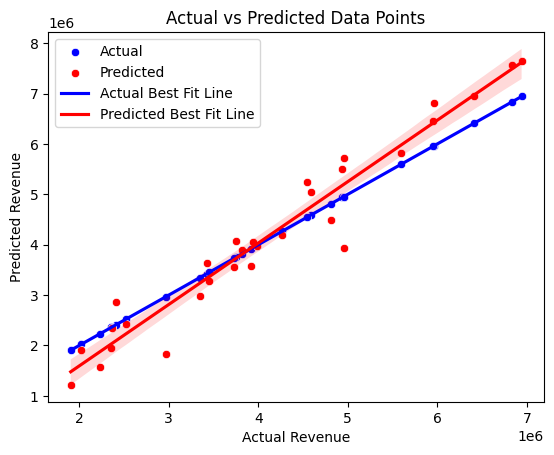

In [36]:
sns.scatterplot(x=Y_test, y=Y_test, color='blue', label='Actual')

sns.scatterplot(x=Y_test, y=Y_pred, color='red', label='Predicted')

sns.regplot(x=Y_test, y=Y_test, scatter=False, color='blue', label='Actual Best Fit Line')

sns.regplot(x=Y_test, y=Y_pred, scatter=False, color='red', label='Predicted Best Fit Line')

plt.title('Actual vs Predicted Data Points')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.show()

In [37]:
#Evaluating the Model

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
mae = mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error is : ", mae)

The Mean Absolute Error is :  426005.6149447493


In [40]:
mse = mean_squared_error(Y_test, Y_pred)
print("The Mean Squared Error is : ", mse)

The Mean Squared Error is :  271880131892.60855


In [41]:
rmse = np.sqrt(mse)
print('The Root Mean Squared Error is : ', rmse)

The Root Mean Squared Error is :  521421.2614504788


In [42]:
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.8647352097095041


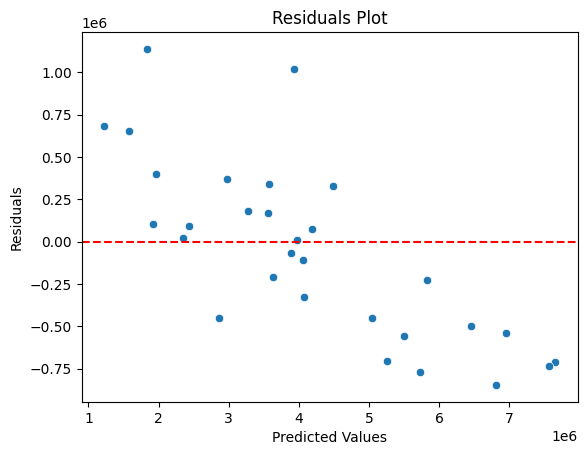

In [43]:
residuals = Y_test - Y_pred

sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

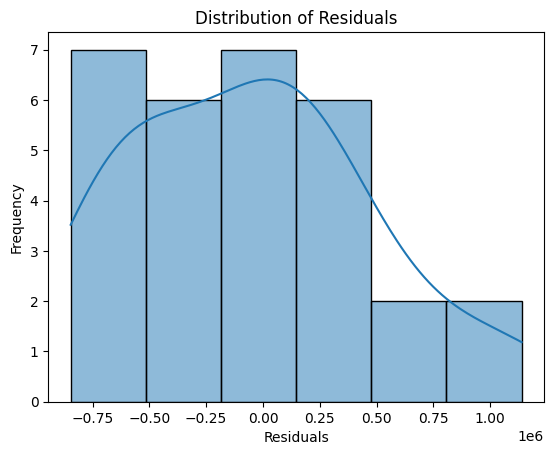

In [44]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#Gradient Descent for Optimization

In [69]:
from sklearn.linear_model import SGDRegressor

# Initialize and train the SGDRegressor model
sgd_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=2000, random_state=42, alpha = 0.001, early_stopping = True, validation_fraction=0.2)
sgd_model.fit(X_train, Y_train)

# Predict using the trained model
y_pred_sgd = sgd_model.predict(X_test)

In [70]:
mae = mean_absolute_error(Y_test, y_pred_sgd)
print("The Mean Absolute Error is : ", mae)

The Mean Absolute Error is :  34390092567056.703


In [59]:
mse = mean_squared_error(Y_test, y_pred_sgd)
print("The Mean Squared Error is : ", mse)

The Mean Squared Error is :  8.822237728164918e+25


In [61]:
np.sqrt(mse)

9392676790013.014

In [62]:
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.8647352097095041


#Random Forest Regressor Model

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_model =  RandomForestRegressor(random_state=42)

In [47]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [48]:
rf_pred = rf_model.predict(X_test)

In [49]:
rf_pred

array([5100706.54, 5798965.77, 4121275.94, 3629484.94, 4163775.97,
       3937983.51, 4090135.58, 3685465.95, 3703945.92, 5047960.26,
       5628895.73, 2990880.35, 3179371.87, 2322507.04, 3265066.76,
       4477022.43, 5639309.99, 1401061.26, 1746501.55, 2050613.31,
       7183358.92, 2020604.54, 2257590.87, 5341672.8 , 3040158.55,
       3170561.33, 7020587.28, 6719787.89, 6336917.99, 2354110.38])

Vizualizing the Predicted data Points

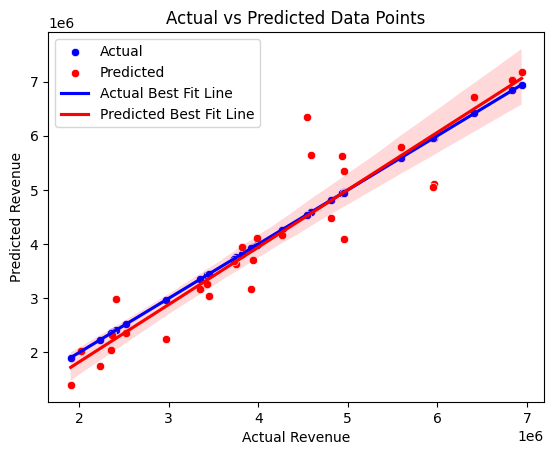

In [50]:
sns.scatterplot(x=Y_test, y=Y_test, color='blue', label='Actual')

sns.scatterplot(x=Y_test, y=rf_pred, color='red', label='Predicted')

sns.regplot(x=Y_test, y=Y_test, scatter=False, color='blue', label='Actual Best Fit Line')

sns.regplot(x=Y_test, y=rf_pred, scatter=False, color='red', label='Predicted Best Fit Line')

plt.title('Actual vs Predicted Data Points')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.show()

#Evaluating the Random Forest Model

In [51]:
mae = mean_absolute_error(Y_test, rf_pred)
print("The Mean Absolute Error is : ", mae)

The Mean Absolute Error is :  430298.504


In [52]:
mse = mean_squared_error(Y_test, rf_pred)
print("The Mean Absolute Error is : ", mse)

The Mean Absolute Error is :  332395376496.4063


In [53]:
rmse = np.sqrt(mse)
print("The Root Mean Absolute Error is : ", rmse)

The Root Mean Absolute Error is :  576537.4025129734


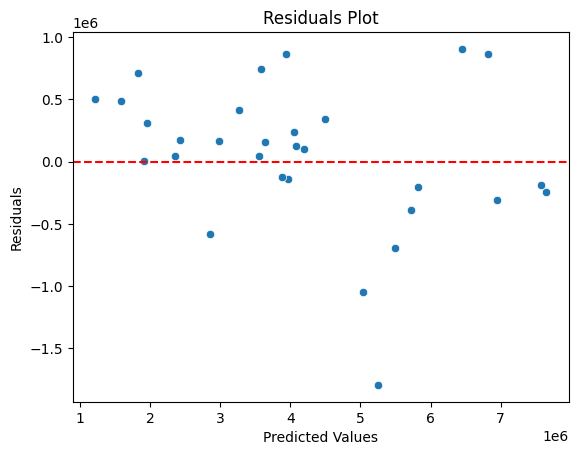

In [54]:
residuals = Y_test - rf_pred

sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

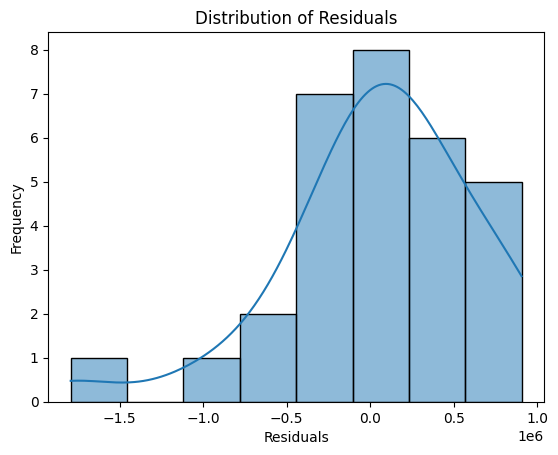

In [55]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()